Dear reader, 

While investigating the code, please also use the presentation to have a better idea about the steps I made to achieve the main goals of this project

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_red=pd.read_csv("winequality-red.csv",sep=";")
df_white=pd.read_csv("winequality-white.csv",sep=";")

In [ ]:
df_red["type"]='Red'
df_white["type"]='White'

In [ ]:
overall_df=pd.concat([df_red,df_white]).reset_index().drop(['index'],axis=1)

In [ ]:
overall_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


In [ ]:
overall_df['type']=overall_df['type'].map({"Red":1,"White":0})

In [ ]:
overall_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
columns=overall_df.columns.values

In [ ]:
cols=np.concatenate((columns[:-2],columns[-1],columns[-2]),axis=None)

In [ ]:
overall_df=overall_df[cols]

In [ ]:
overall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   int64  
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


BASELINE METHOD: Implementing multiple linear regression with using standard normalization

In [ ]:
X=overall_df.iloc[:,:-1].values
y=overall_df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
continuous_X_train=X_train[:,:-1]

In [ ]:
scaler=StandardScaler().fit(continuous_X_train)
standardized_X_train=scaler.transform(continuous_X_train)

In [ ]:
X_train[:,:-1]=standardized_X_train

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
predicted=model.predict(X_train)
mae_train=mean_absolute_error(y_train,predicted)

In [ ]:
mae_train

0.5641098795818866

In [ ]:
model.predict(X_train)

array([5.97191332, 6.02531075, 5.46896665, ..., 5.82497332, 6.39279805,
       5.51326018])

In [ ]:
d=np.array([6,6,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,44,4,4,4,4,4,4,44,4,4,4,4,4,6,6,6])
np.concatenate((d[:3],d[-3:]))

array([6, 6, 5, 6, 6, 6])

In [ ]:
y_train

array([5, 6, 5, ..., 5, 6, 5])

In [ ]:
def calculate_accuracy(predicted,actual):
  acc=0
  rounder=lambda x: round(x)
  rounder_f=np.vectorize(rounder)
  predicted_rounded=rounder_f(predicted)
  for i in range(len(actual)):
    if actual[i]==predicted_rounded[i]:
      acc+=1
    else:
      pass
  acc=acc/len(actual)
  return acc

In [ ]:
predicted_train=model.predict(X_train)
train_acc=calculate_accuracy(predicted_train,y_train)

In [ ]:
train_acc

0.5334564860426929

In [ ]:
np.random.seed(12)
randomly_predicted=np.random.randint(3,10,size=len(y_train))
threshold=calculate_accuracy(randomly_predicted,y_train)

In [ ]:
threshold

0.13444170771756978

In [ ]:
continuous_X_test=X_test[:,:-1]
standardized_X_test=scaler.transform(continuous_X_test)

In [ ]:
X_test[:,:-1]=standardized_X_test

In [ ]:
predicted_test=model.predict(X_test)
test_acc=calculate_accuracy(predicted_test,y_test)

In [ ]:
test_acc

0.5292307692307693

In [ ]:
mae_test=mean_absolute_error(y_test,predicted_test)

In [ ]:
mae_test

0.5818614560058238

EDA: Plotting histograms to see how each variable in the data is distributed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cf31bd370>,
      dtype=object)

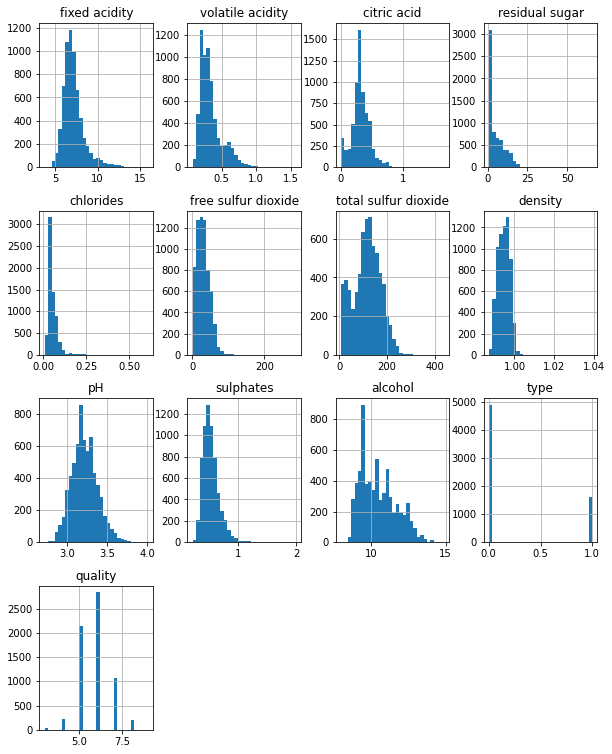

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

overall_df.hist(bins=30, figsize=(10, 13))

EDA: Plotting boxplots to observe the outliers and how they are compared to the five-number summary of each variable

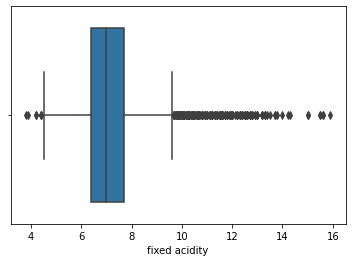

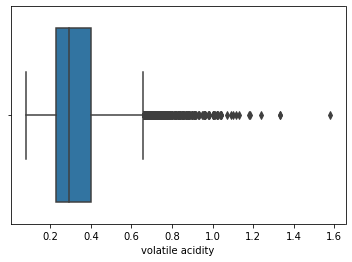

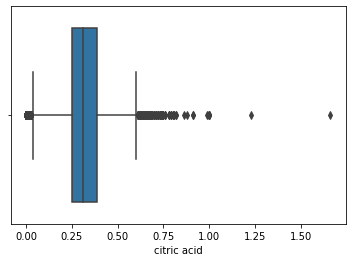

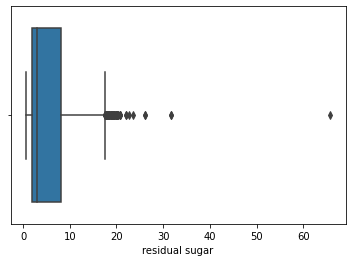

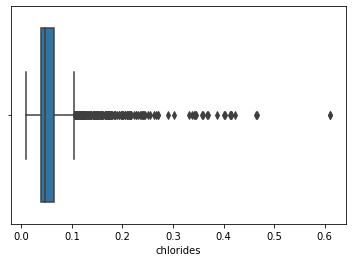

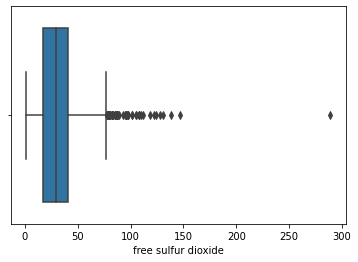

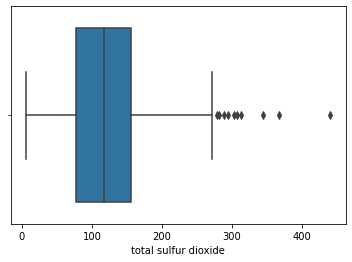

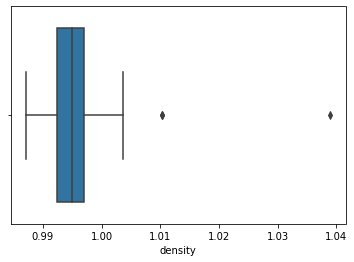

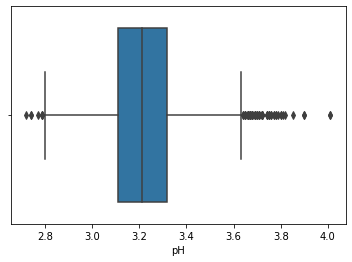

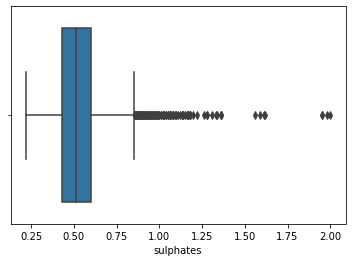

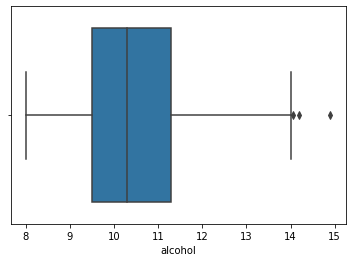

In [ ]:
import seaborn as sns
for col in cols[:-2]:
  sns.boxplot(x=overall_df[col])
  plt.show()

As seen in the boxplots, there is a high amount of outliers. It makes sense to calculate the exact number of outliers

In [ ]:
input_v_without_type=overall_df[cols[:-2]]
Q1 =input_v_without_type.quantile(0.25)
Q3 =input_v_without_type.quantile(0.75)
IQR =Q3 - Q1
number_of_outliers=((input_v_without_type< (Q1 - 1.5 * IQR)) | (input_v_without_type > (Q3 + 1.5 * IQR))).sum()
percentage_of_outliers=number_of_outliers*100/len(input_v_without_type)
outliers_df=pd.DataFrame()
outliers_df['# of outliers']=number_of_outliers
outliers_df['% of outliers']=percentage_of_outliers
outliers_df.set_index(number_of_outliers.index)

,# of outliers,% of outliers
fixed acidity,357,5.494844
volatile acidity,377,5.802678
citric acid,509,7.834385
residual sugar,118,1.816223
chlorides,286,4.402032
free sulfur dioxide,62,0.954287
total sulfur dioxide,10,0.153917
density,3,0.046175
pH,73,1.123596
sulphates,191,2.939818


Cubic transformation is very effective for dealing with features that are positively skewed and contain lots of outliers above the higher fence. 

Unfortunately, the transformation will not be effective for citric acid and fixed acidity as they are not perfectly skewed to the right and they carry outliers in both sides of the distribution

In [ ]:
columns_with_most_outliers=['volatile acidity','residual sugar','chlorides','sulphates']
overall_transformed_df=pd.DataFrame()
for column in columns_with_most_outliers:
  overall_transformed_df[column]=overall_df[column].map(np.cbrt)

In [ ]:
Q1 =overall_transformed_df.quantile(0.25)
Q3 =overall_transformed_df.quantile(0.75)
IQR =Q3 - Q1
number_of_outliers=((overall_transformed_df< (Q1 - 1.5 * IQR)) | (overall_transformed_df > (Q3 + 1.5 * IQR))).sum()
percentage_of_outliers=number_of_outliers*100/len(overall_transformed_df)
outliers_df=pd.DataFrame()
outliers_df['# of outliers']=number_of_outliers
outliers_df['% of outliers']=percentage_of_outliers
outliers_df.set_index(number_of_outliers.index)

,# of outliers,% of outliers
volatile acidity,119,1.831615
residual sugar,1,0.015392
chlorides,170,2.616592
sulphates,103,1.585347


In [ ]:
initial_cols=overall_df.columns
updated_cols=overall_transformed_df.columns
not_intersected_cols = np.setxor1d(initial_cols, updated_cols)

In [ ]:
overall_transformed_df[not_intersected_cols]=overall_df[not_intersected_cols]

In [ ]:
columns=overall_df.columns.values
overall_transformed_df=overall_transformed_df[columns]

RobustScaler is implemented to decrease the outlier influence of features that weren't transformed

In [ ]:
from sklearn.preprocessing import RobustScaler
X=overall_transformed_df.iloc[:,:-1].values
y=overall_transformed_df.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)
continuous_X_train=X_train[:,:-1]
scaler=RobustScaler().fit(continuous_X_train)
standardized_X_train=scaler.transform(continuous_X_train)
X_train[:,:-1]=standardized_X_train
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
predicted_train=model.predict(X_train)
mae_train_after_transformation=mean_absolute_error(y_train,predicted_train)
train_acc_after_transformation=calculate_accuracy(predicted_train,y_train)

In [ ]:
print("MAE: ",mae_train_after_transformation)
print("Train accuracy: ",train_acc_after_transformation)

MAE:  0.5606659441446586
Train accuracy:  0.5381773399014779


In [ ]:
continuous_X_test=X_test[:,:-1]
standardized_X_test=scaler.transform(continuous_X_test)
X_test[:,:-1]=standardized_X_test
predicted_test=model.predict(X_test)
test_acc_after_transformation=calculate_accuracy(predicted_test,y_test)

In [ ]:
mae_test_after_transformation=mean_absolute_error(y_test,predicted_test)

In [ ]:
print("MAE: ",mae_test_after_transformation)
print("Test accuracy: ",test_acc_after_transformation)

MAE:  0.5788272065333047
Test accuracy:  0.5347692307692308


EDA: Plotting stripplots to se whether the type of wine has an impact on the overall range of the features

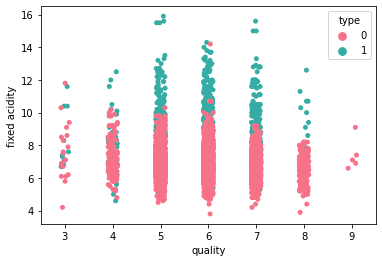

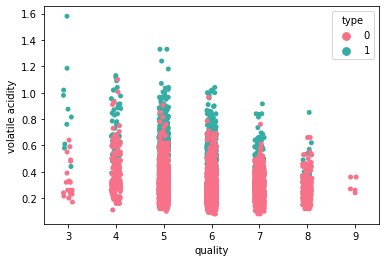

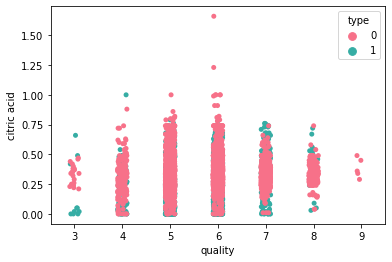

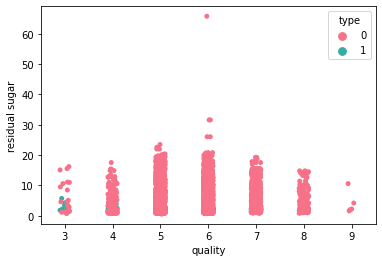

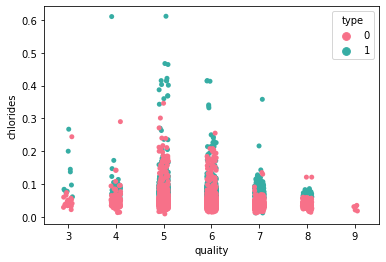

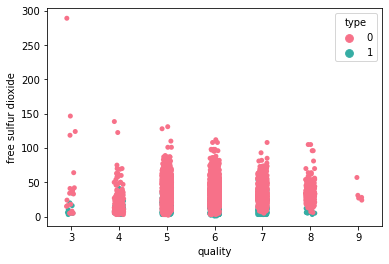

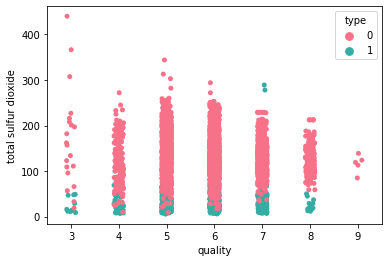

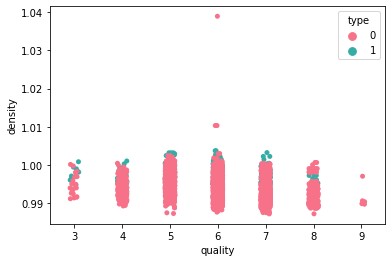

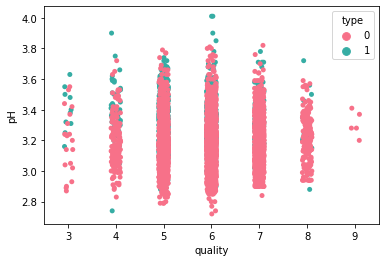

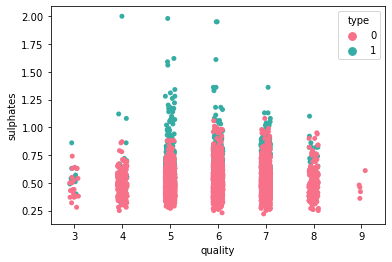

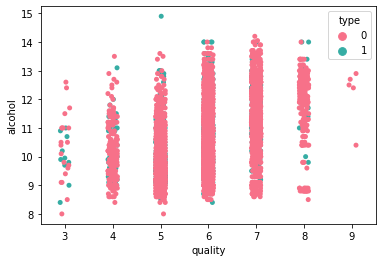

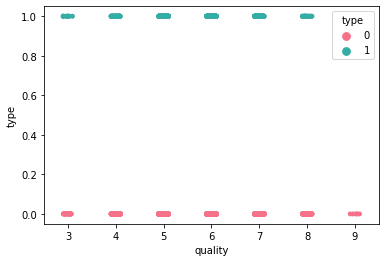

In [ ]:
for c in overall_df.columns.values[:-1]:
  sns.stripplot(x="quality", y=c, data=overall_df, palette="husl",hue="type")
  plt.show()

EDA: Plotting grouped boxplots to see whether the type of wine affects the correlation between input features and quality

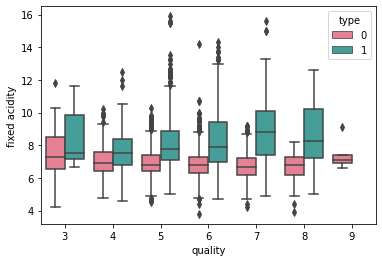

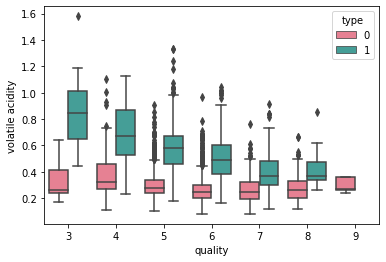

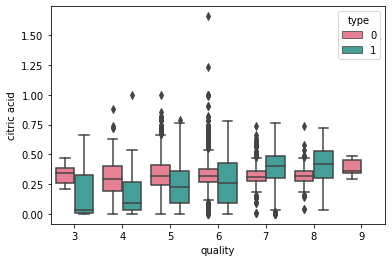

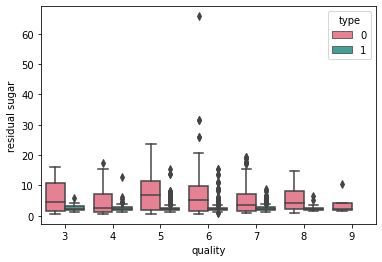

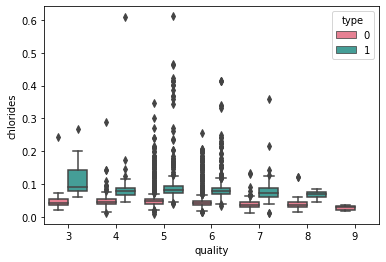

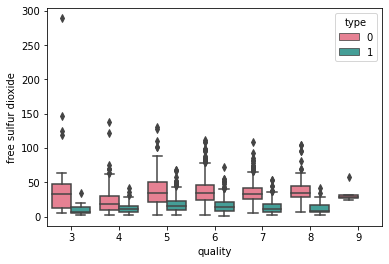

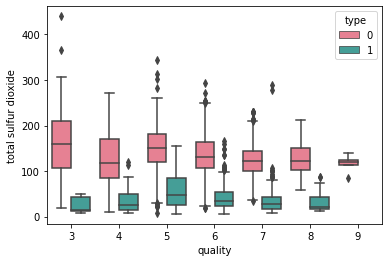

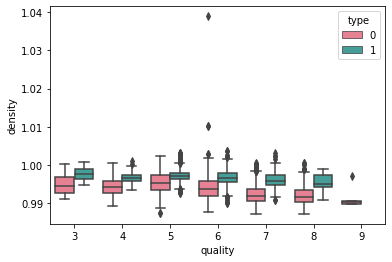

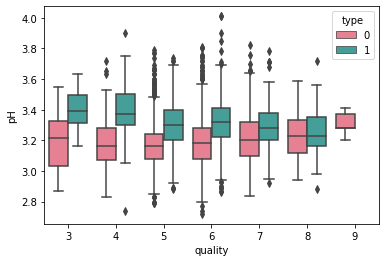

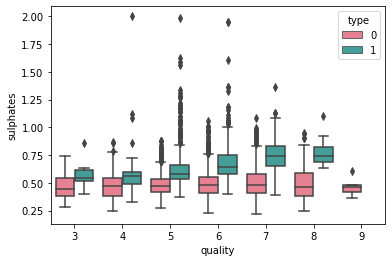

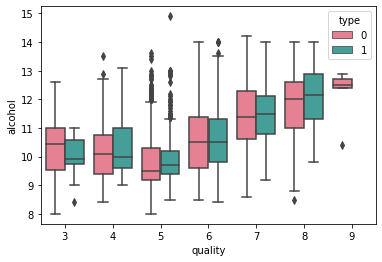

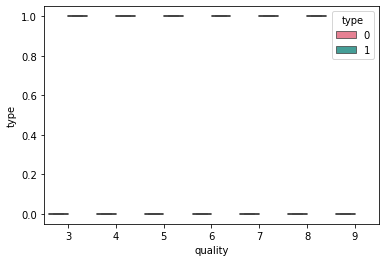

In [ ]:
for c in overall_df.columns.values[:-1]:
  sns.boxplot(x="quality", y=c, data=overall_df, palette="husl",hue="type")
  plt.show()

Through looking to these plots, we can say that red and white wine affect some features differently (e.g., volatile acidity, sulphates, citric acid)

In [ ]:
red_wine_df=overall_df[overall_df['type']==1].drop(['type'],axis=1)
white_wine_df=overall_df[overall_df['type']==0].drop(['type'],axis=1)

EDA: Making separate correlation plot for each type of wine to identify highly correlated features

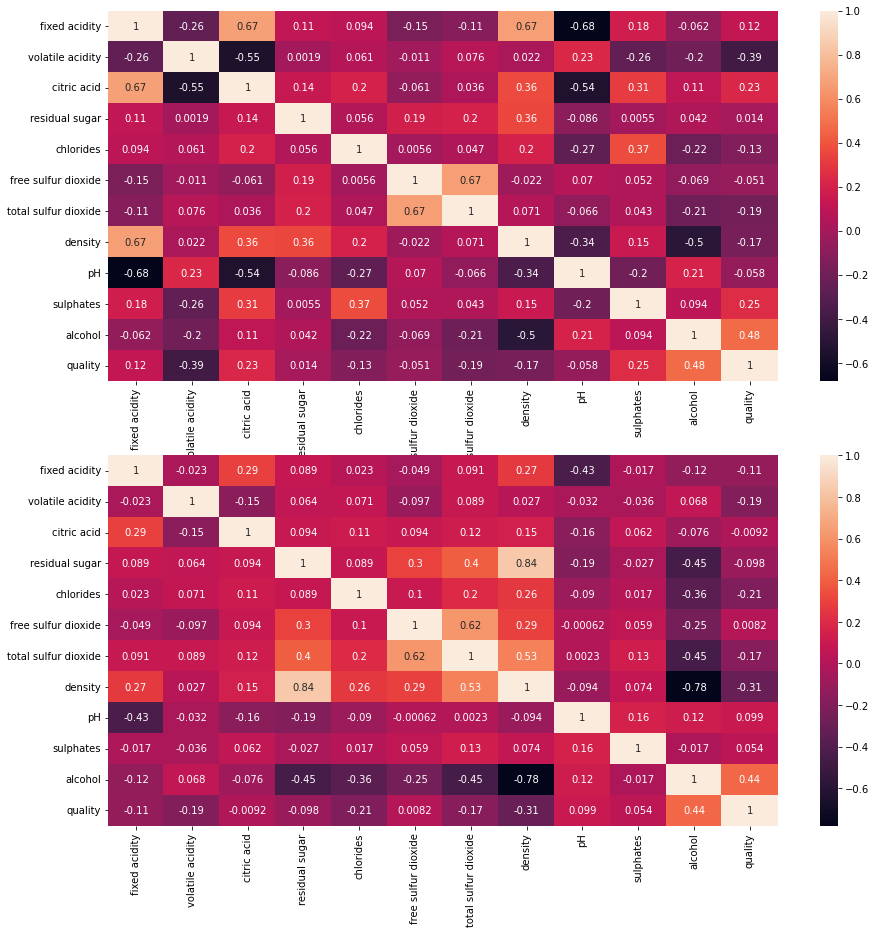

In [ ]:
corr_red=red_wine_df.corr()
corr_white=white_wine_df.corr()
fig, ax = plt.subplots(2, 1)
fig.set_figheight(15)
fig.set_figwidth(15)
sns.heatmap(corr_red,annot=True,ax=ax[0],)
sns.heatmap(corr_white,annot=True,ax=ax[1])
fig.show()

Highly correlated relationships in the white wine features:

density - alcohol 

density - residual sugar

total sulfur dioxide - free sulfur dioxide

Highly correlated relationships in the red wine features:

total sulfur dioxide - free sulfur dioxide

pH - fixed acidity

citric acid - fixed acidity

density - fixed acidity




High correlation between input variables causes multicollinearity. It's measured by Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(df,considered_features):
    X = df.loc[:,considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
considered_features_white = ['density','alcohol','residual sugar','total sulfur dioxide','free sulfur dioxide']
compute_vif(white_wine_df,considered_features_white).sort_values('VIF', ascending=False)

,Variable,VIF
0,density,11.805234
2,residual sugar,5.583897
1,alcohol,4.059697
3,total sulfur dioxide,2.130718
4,free sulfur dioxide,1.703707


In [ ]:
considered_features_red = ['total sulfur dioxide','free sulfur dioxide','pH','fixed acidity','citric acid','density']
compute_vif(red_wine_df,considered_features_red).sort_values('VIF', ascending=False)

,Variable,VIF
3,fixed acidity,4.575093
2,pH,2.138407
5,density,2.081106
0,total sulfur dioxide,2.054137
4,citric acid,1.952428
1,free sulfur dioxide,1.861019


In [ ]:
considered_features_white.remove('density')
compute_vif(white_wine_df,considered_features_white).sort_values('VIF', ascending=False)

,Variable,VIF
2,total sulfur dioxide,1.940116
3,free sulfur dioxide,1.625120
0,alcohol,1.411774
1,residual sugar,1.349010


Type of wine needs to be taken into account when training the model because we can't assign the same coefficient to the features of both white and red wine, as their impact on features and quality is different. That's why separate MLR model will be trained for each type of wine 

In [ ]:
white_wine_df.drop(['density'],axis=1,inplace=True)

In [ ]:
columns_with_most_outliers=['volatile acidity','residual sugar','chlorides','sulphates']
for column in columns_with_most_outliers:
  white_wine_df[column]=white_wine_df[column].map(np.cbrt)
  red_wine_df[column]=red_wine_df[column].map(np.cbrt)

In [ ]:
X_white=white_wine_df.iloc[:,:-1].values
X_red=red_wine_df.iloc[:,:-1].values
y_white=white_wine_df.iloc[:,-1].values
y_red=red_wine_df.iloc[:,-1].values

In [ ]:
Xw_train,Xw_test,yw_train,yw_test=train_test_split(X_white,y_white,test_size=0.25,random_state=10)

In [ ]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_red,y_red,test_size=0.25,random_state=10)

In [ ]:
scaler_w=RobustScaler().fit(Xw_train)
standardized_Xw_train=scaler_w.transform(Xw_train)

In [ ]:
scaler_r=RobustScaler().fit(Xr_train)
standardized_Xr_train=scaler_r.transform(Xr_train)

In [ ]:
model_w=LinearRegression()
model_w.fit(standardized_Xw_train,yw_train)

LinearRegression()

In [ ]:
model_r=LinearRegression()
model_r.fit(standardized_Xr_train,yr_train)

LinearRegression()

In [ ]:
predicted_w=model_w.predict(standardized_Xw_train)
mae_train_w=mean_absolute_error(yw_train,predicted_w)

In [ ]:
mae_train_w

0.5849730219841649

In [ ]:
train_acc_w=calculate_accuracy(predicted_w,yw_train)

In [ ]:
train_acc_w

0.523277974407841

In [ ]:
predicted_r=model_r.predict(standardized_Xr_train)
mae_train_r=mean_absolute_error(yr_train,predicted_r)

In [ ]:
mae_train_r

0.4913514006903156

In [ ]:
train_acc_r=calculate_accuracy(predicted_r,yr_train)

In [ ]:
train_acc_r

0.6121768140116765

In [ ]:
mean_train_acc=(train_acc_r+train_acc_w)/2

In [ ]:
mean_train_mae=(mae_train_w+mae_train_r)/2

In [ ]:
mean_train_acc

0.5677273942097587

In [ ]:
mean_train_mae

0.5381622113372402

In [ ]:
standardized_Xw_test=scaler_w.transform(Xw_test)

In [ ]:
predicted_w=model_w.predict(standardized_Xw_test)
mae_test_w=mean_absolute_error(yw_test,predicted_w)

In [ ]:
mae_test_w

0.581342600822596

In [ ]:
test_acc_w=calculate_accuracy(predicted_w,yw_test)

In [ ]:
test_acc_w

0.5289795918367347

In [ ]:
r2_score_w=model_w.score(standardized_Xw_test,yw_test)

In [ ]:
r2_score_w

0.2854747288938725

In [ ]:
def calculate_adjusted_r2_score(r2_score,sample_size,n_variables):
  adj_r2 = (1 - (1 - r2_score) * ((sample_size - 1) / (sample_size - n_variables - 1)))
  return adj_r2

In [ ]:
adjusted_r2_score_w=calculate_adjusted_r2_score(r2_score_w,len(yw_test),standardized_Xw_test.shape[1])

In [ ]:
adjusted_r2_score_w

0.2795890182587314

In [ ]:
standardized_Xr_test=scaler_r.transform(Xr_test)
predicted_r=model_r.predict(standardized_Xr_test)
mae_test_r=mean_absolute_error(yr_test,predicted_r)

In [ ]:
mae_test_r

0.5261890278753651

In [ ]:
test_acc_r=calculate_accuracy(predicted_r,yr_test)
test_acc_r

0.5675

In [ ]:
r2_score_r=model_r.score(standardized_Xr_test,yr_test)

In [ ]:
r2_score_r

0.38619456642424155

In [ ]:
adjusted_r2_score_r=calculate_adjusted_r2_score(r2_score_r,len(yr_test),standardized_Xr_test.shape[1])

In [ ]:
adjusted_r2_score_r

0.36879286598781547

In [ ]:
mean_test_acc=(test_acc_r+test_acc_w)/2

In [ ]:
mean_test_mae=(mae_test_w+mae_test_r)/2

In [ ]:
mean_test_acc

0.5482397959183674

In [ ]:
mean_test_mae

0.5537658143489805

In [ ]:
white_wine_df_all_cols=overall_df[overall_df['type']==0].drop(['type'],axis=1)
columns_with_most_outliers=['volatile acidity','residual sugar','chlorides','sulphates']
for column in columns_with_most_outliers:
  white_wine_df_all_cols[column]=white_wine_df_all_cols[column].map(np.cbrt)
X_white=white_wine_df_all_cols.iloc[:,:-1].values
y_white=white_wine_df_all_cols.iloc[:,-1].values
Xw_train,Xw_test,yw_train,yw_test=train_test_split(X_white,y_white,test_size=0.25,random_state=10)
scaler_w=RobustScaler().fit(Xw_train)
standardized_Xw_train=scaler_w.transform(Xw_train)
model_w_2=LinearRegression()
model_w_2.fit(standardized_Xw_train,yw_train)
predicted_w=model_w_2.predict(standardized_Xw_train)
train_acc_w_before=calculate_accuracy(predicted_w,yw_train)
mae_train_w_before=mean_absolute_error(yw_train,predicted_w)

In [ ]:
train_acc_w_before

0.5251837734821672

In [ ]:
mae_train_w_before

0.5835842036203546

In [ ]:
standardized_Xw_test=scaler_w.transform(Xw_test)
predicted_w=model_w_2.predict(standardized_Xw_test)
mae_test_w_before=mean_absolute_error(yw_test,predicted_w)

In [ ]:
mae_test_w_before

0.5803445410674518

In [ ]:
test_acc_w_before=calculate_accuracy(predicted_w,yw_test)

In [ ]:
test_acc_w_before

0.5289795918367347

In [ ]:
r2_score_w_before=model_w_2.score(standardized_Xw_test,yw_test)

In [ ]:
r2_score_w_before

0.29105747801042814

In [ ]:
adjusted_r2_score_w_before=calculate_adjusted_r2_score(r2_score_w_before,len(yw_test),standardized_Xw_test.shape[1])

In [ ]:
adjusted_r2_score_w_before

0.28462848564283927

In [ ]:
pd.DataFrame(zip(df_white.columns, model_w_2.coef_))

,0,1
0,fixed acidity,-0.015756
1,volatile acidity,-0.250228
2,citric acid,0.008059
3,residual sugar,0.496714
4,chlorides,-0.018648
5,free sulfur dioxide,0.076530
6,total sulfur dioxide,-0.016591
7,density,-0.301379
8,pH,0.066943
9,sulphates,0.089615


In [ ]:
pd.DataFrame(zip(white_wine_df.columns, model_w.coef_))

,0,1
0,fixed acidity,-0.068492
1,volatile acidity,-0.254332
2,citric acid,0.003034
3,residual sugar,0.267632
4,chlorides,-0.026728
5,free sulfur dioxide,0.087925
6,total sulfur dioxide,-0.029080
7,pH,0.019746
8,sulphates,0.074197
9,alcohol,0.689162


In [ ]:
pd.DataFrame(zip(red_wine_df.columns, model_r.coef_))

,0,1
0,fixed acidity,0.031368
1,volatile acidity,-0.280656
2,citric acid,-0.086991
3,residual sugar,0.007396
4,chlorides,-0.061537
5,free sulfur dioxide,0.034146
6,total sulfur dioxide,-0.137235
7,density,-0.010865
8,pH,-0.080888
9,sulphates,0.194248


[Text(0, 0, 'train accuracy'), Text(0, 0, 'test accuracy')]

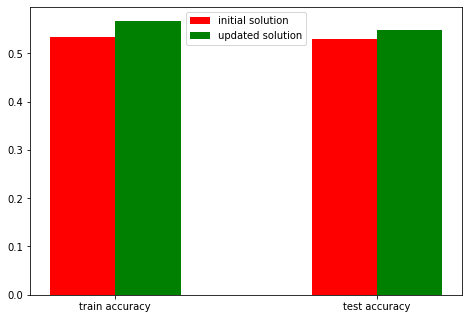

In [ ]:
X = np.arange(2)
initial=[train_acc,test_acc]
updated=[mean_train_acc,mean_test_acc]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.125, initial, color = 'r', width = 0.25)
ax.bar(X + 0.125, updated, color = 'g', width = 0.25)
labels=["initial solution","updated solution"]
plt.legend(labels,loc=9)
ax.set_xticks(X)
ax.set_xticklabels(["train accuracy","test accuracy"]) 

[Text(0, 0, 'train accuracy'), Text(0, 0, 'test accuracy')]

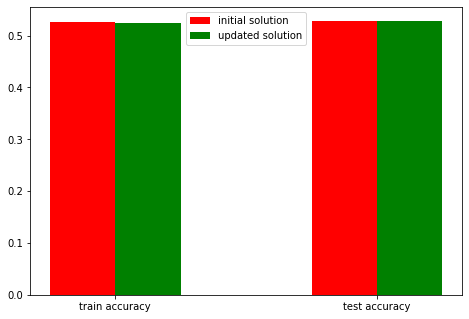

In [ ]:
X = np.arange(2)
initial_w=[train_acc_w_before,test_acc_w_before]
updated_w=[train_acc_w,test_acc_w]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.125, initial_w, color = 'r', width = 0.25)
ax.bar(X + 0.125, updated_w, color = 'g', width = 0.25)
labels=["initial solution","updated solution"]
plt.legend(labels,loc=9)
ax.set_xticks(X)
ax.set_xticklabels(["train accuracy","test accuracy"]) 

In [ ]:
r2_scores_initial=[r2_score_w_before,adjusted_r2_score_w_before]
r2_scores_updated=[r2_score_w,adjusted_r2_score_w]

In [ ]:
summary_df=pd.DataFrame()
summary_df['initial solution']=r2_scores_initial
summary_df['updated solution']=r2_scores_updated
summary_df.set_index(pd.Index(['r2','adjusted r2']))

,initial solution,updated solution
r2,0.291057,0.285475
adjusted r2,0.284628,0.279589


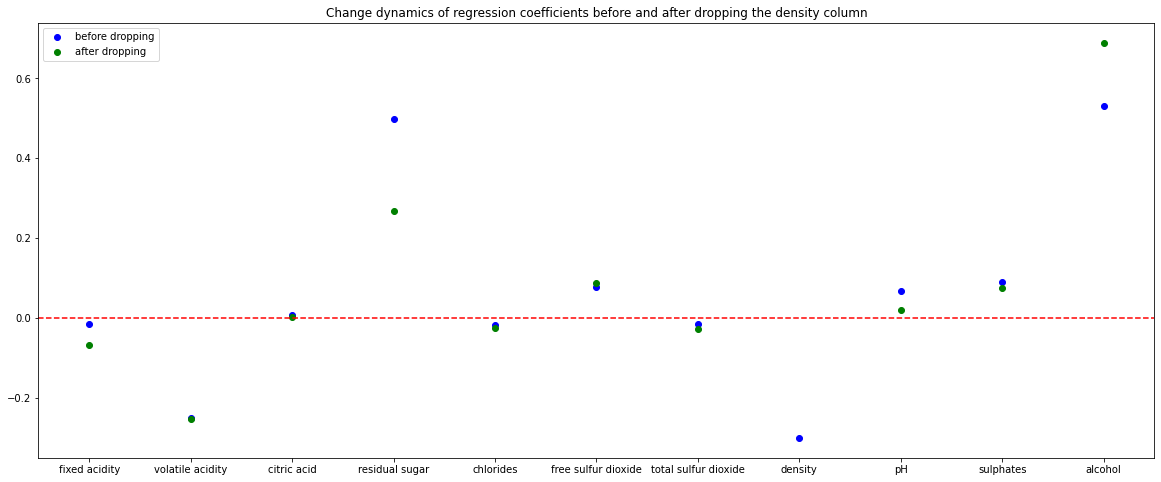

In [ ]:
coef_model_before_dropping=pd.DataFrame(zip(df_white.columns, model_w_2.coef_))
x_before=list(coef_model_before_dropping.iloc[:,0])
y_before=list(coef_model_before_dropping.iloc[:,1])
coef_model_after_dropping=pd.DataFrame(zip(white_wine_df.columns, model_w.coef_))
x=list(coef_model_after_dropping.iloc[:,0])
y=list(coef_model_after_dropping.iloc[:,1])
f = plt.figure(figsize=(20,8))
plt.scatter(x_before, y_before, c ="blue")
plt.scatter(x,y,c="green")
plt.axhline(y = 0, color = 'r', linestyle = 'dashed',label='_nolegend_')
plt.title("Change dynamics of regression coefficients before and after dropping the density column")
plt.legend(['before dropping','after dropping'])
plt.style.use('ggplot')
plt.show()